# Exploring Why Civil Resistance Works

<p/>This is the second project for the course "Applied Machine Learning" in 7th semester of the department of Management Science & Technology  in Athens University of Economics & Business. </p>

---

> Ioanna Ntousaki <br/>
> AM : 8200125 </br>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8200125@aueb.gr

## Preparation

In [1]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.formula.api import logit
import xlrd

In [2]:
# Read data files into dataframes
navco = pd.read_csv('data/navco.tab', sep='\t', lineterminator='\n',header=0)
# Remove rows with no content - where all values are NaN
navco = navco.dropna(how='all')
pd.set_option('display.max_columns', None)
navco.head()

NAVCOID                        CAMPAIGN     LOCATION   BYEAR   EYEAR  \
0      4.0                         Afghans  Afghanistan  1978.0  1979.0   
1      3.0               Afghan resistance  Afghanistan  1980.0  1989.0   
2    218.0  Taliban/anti-government forces  Afghanistan  1992.0  1996.0   
3    217.0                         Taliban  Afghanistan  2001.0  2014.0   
4      5.0         Albanian anti-communist      Albania  1990.0  1991.0   

              TARGET  SUCCESS  LIMITED  FAILURE  ONGOING  NONVIOL  VIOL  \
0  Afghan government      1.0      0.0      0.0      0.0      0.0   1.0   
1  Soviet occupation      1.0      0.0      0.0      0.0      0.0   1.0   
2      Afghan regime      1.0      0.0      0.0      0.0      0.0   1.0   
3  Afghan government      0.0      0.0      1.0      1.0      0.0   1.0   
4   Communist regime      1.0      0.0      0.0      0.0      1.0   0.0   

   REGCHANGE  FSELFDET  SECESSION  OTHER  DURATION  PARTICIPATION  \
0        1.0       0.0        0.0    0.0     613.0        10000.0   
1        0.0       1.0        0.0    0.0    3281.0        10000.0   
2        1.0       0.0        0.0    0.0    1370.0        20000.0   
3        1.0       0.0        0.0    0.0    4391.0        60000.0   
4        1.0       0.0        0.0    0.0     442.0       300000.0   

   PERCENTAGEPOPULARPARTICIPATION  REGVIOL  DEFECT  VIOLENTFLANK  VIOLSIM  \
0                        0.000641      1.0     1.0           NaN      1.0   
1                        0.000685      1.0     0.0           NaN      1.0   
2                        0.000893      1.0     0.0           NaN      1.0   
3                        0.001625      1.0     1.0           NaN      1.0   
4                        0.091068      1.0     0.0           0.0      1.0   

   REGAID  STATESUP  
0     1.0       1.0  
1     0.0       1.0  
2     0.0       0.0  
3     1.0       0.0  
4     1.0       0.0

## 1. Exploration of Historical Trends

*Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.*

In [3]:
# Count for each year the violent and non-violent campaigns
violism_frequency = navco.groupby(['EYEAR', 'VIOL'])['VIOL'].count().unstack(fill_value=0).reset_index()
# Keep from each date the first 3 digits that indicate the decade and then 'multiply' with 10 to get the full year
violism_frequency['EYEAR'] = (violism_frequency['EYEAR'].astype(str).str[:3] + '0').astype(int)
# Sum the number of violent and non-violent campaigns for each decade
violism_frequency = violism_frequency.groupby('EYEAR').sum().reset_index()
# Change column names
violism_frequency.columns = ['Decade', 'NonViolent', 'Violent']
violism_frequency.head(60)


Decade  NonViolent  Violent
0    1940           2       12
1    1950           9       25
2    1960           8       21
3    1970          13       27
4    1980          30       17
5    1990          36       54
6    2000          37       23
7    2010          34       41

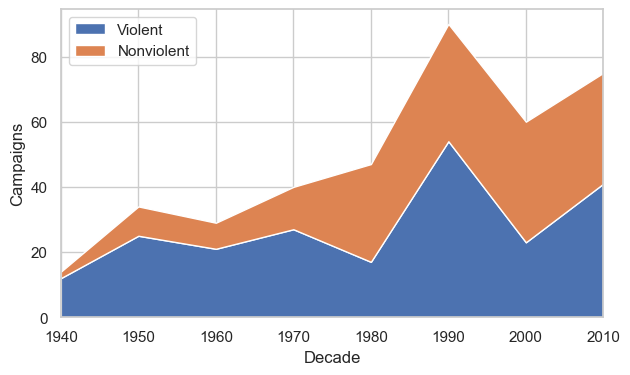

In [4]:
# Create a stackplot using the violism_frequency table
plt.figure(figsize=(7,4))
sns.set_theme(style="whitegrid")
plt.stackplot(violism_frequency.Decade, violism_frequency.Violent, violism_frequency.NonViolent, labels=['Violent', 'Nonviolent'])
plt.legend(loc='upper left')
# Confine the plot to the range of decades existing in the table
plt.xlim(violism_frequency['Decade'].min(), violism_frequency['Decade'].max())
# Add titles
plt.xlabel("Decade")
plt.ylabel("Campaigns")
plt.show()

*Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.*

In [5]:
# Count for each year the success of non-violent campaigns
nonViolent_campaign_success = navco[(navco['VIOL'] == 0) & (navco['SUCCESS'] == 1)].groupby(['EYEAR'])['EYEAR'].agg(Success_frequency = 'count').reset_index()
# Keep from each date the first 3 digits that indicate the decade and then add a zero in the end to get the full year
nonViolent_campaign_success['EYEAR'] = (nonViolent_campaign_success['EYEAR'].astype(str).str[:3] + '0').astype(int)
# Sum the number of non-violent campaigns for each decade
nonViolent_campaign_success = nonViolent_campaign_success.groupby('EYEAR').sum().reset_index()
# Change column names
nonViolent_campaign_success.columns = ['Decade', 'Success_frequency']
# Calculate total campaigns per decade
violism_frequency['Total_Nonviolent'] = violism_frequency['NonViolent']
# Calculate percentage of non-violent successful campaigns
nonViolent_campaign_success = nonViolent_campaign_success.join(violism_frequency.Total_Nonviolent)
nonViolent_campaign_success['Success_Percentage'] =( nonViolent_campaign_success['Success_frequency'] / nonViolent_campaign_success['Total_Nonviolent'])
nonViolent_campaign_success

Decade  Success_frequency  Total_Nonviolent  Success_Percentage
0    1940                  1                 2            0.500000
1    1950                  2                 9            0.222222
2    1960                  2                 8            0.250000
3    1970                  7                13            0.538462
4    1980                 14                30            0.466667
5    1990                 30                36            0.833333
6    2000                 25                37            0.675676
7    2010                 13                34            0.382353

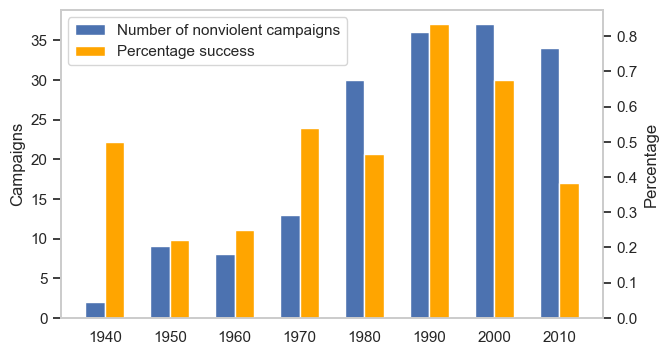

In [6]:
fig, ax1 = plt.subplots(figsize=(7,4))

bar_width = 3

# Plot the number of nonviolent campaigns
ax1.bar(nonViolent_campaign_success['Decade'] - bar_width/2, nonViolent_campaign_success['Total_Nonviolent'], width=bar_width, label='Number of nonviolent campaigns')
ax1.set_ylabel('Campaigns')
ax1.tick_params('y')

# Plot success percentage in a secondary axis
ax2 = ax1.twinx()
ax2.bar(nonViolent_campaign_success['Decade'] + bar_width/2, nonViolent_campaign_success['Success_Percentage'], width=bar_width,color='orange', label='Percentage success')
ax2.set_ylabel('Percentage')
ax2.tick_params('y')

# Add legend
color1, label1 = ax1.get_legend_handles_labels()
color2, label2 = ax2.get_legend_handles_labels()
ax2.legend(color1 + color2, label1 + label2, loc='upper left')

ax1.grid(False)
ax2.grid(False)




*Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should show that nonviolent campaigns have higher success probabilities.*

In [7]:
# Count for each year the success of violent campaigns
violent_campaign_success = navco[(navco['VIOL'] == 1) & (navco['SUCCESS'] == 1)].groupby(['EYEAR'])['EYEAR'].agg(Success_frequency = 'count').reset_index()
# Keep from each date the first 3 digits that indicate the decade and then add a zero in the end to get the full year
violent_campaign_success['EYEAR'] = (violent_campaign_success['EYEAR'].astype(str).str[:3] + '0').astype(int)
# Sum the number of violent campaigns for each decade
violent_campaign_success = violent_campaign_success.groupby('EYEAR').sum().reset_index()
# Change column names
violent_campaign_success.columns = ['Decade', 'Success_frequency']
# Calculate total campaigns per decade
violism_frequency['Total_Violent'] = violism_frequency['Violent']
# Calculate percentage of violent successful campaigns
violent_campaign_success = violent_campaign_success.join(violism_frequency.Total_Violent)
violent_campaign_success['Success_Percentage'] =( violent_campaign_success['Success_frequency'] / violent_campaign_success['Total_Violent'])
violent_campaign_success

Decade  Success_frequency  Total_Violent  Success_Percentage
0    1940                  6             12            0.500000
1    1950                  8             25            0.320000
2    1960                  4             21            0.190476
3    1970                 12             27            0.444444
4    1980                  5             17            0.294118
5    1990                 15             54            0.277778
6    2000                  3             23            0.130435
7    2010                  3             41            0.073171

In [8]:
# Merge Nonviolent and Violent successful campaigns percentages into one table
successful_campaigns = nonViolent_campaign_success[['Decade', 'Success_Percentage']].set_index('Decade')
successful_campaigns = successful_campaigns.rename(columns = {'Success_Percentage' : 'nonviolent'})
successful_campaigns['violent'] = violent_campaign_success[['Decade', 'Success_Percentage']].set_index('Decade')
# Transform table by stacking the data by decade to be easily presented
successful_campaigns = successful_campaigns.stack().reset_index()
successful_campaigns.columns = ['Decade','Type','Success']
successful_campaigns.head()

Decade        Type   Success
0    1940  nonviolent  0.500000
1    1940     violent  0.500000
2    1950  nonviolent  0.222222
3    1950     violent  0.320000
4    1960  nonviolent  0.250000

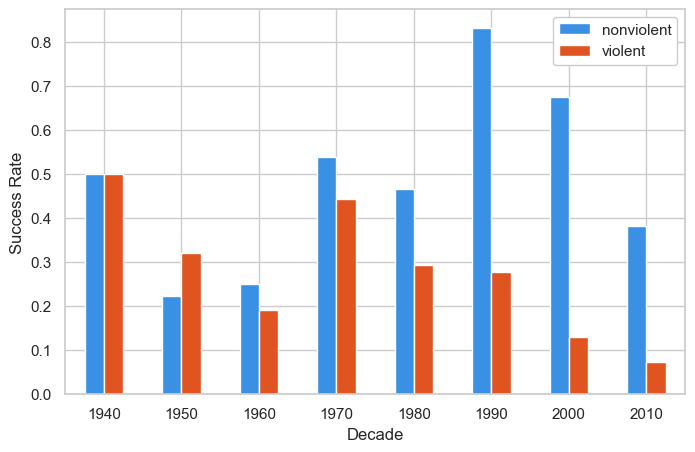

In [9]:
# Create a barplot to present the violent and non-violent success rate
plt.figure(figsize=(8, 5))
palette = {'nonviolent': 'dodgerblue', 'violent': 'orangered'}
sns.barplot(successful_campaigns, x='Decade', y='Success', edgecolor=None, hue='Type',legend='full', width=0.5, palette = palette)
plt.legend(loc='upper right', framealpha = 1)
plt.xlabel('Decade')
plt.ylabel('Success Rate')
plt.grid(True)


## 2. Largest Resistance Campaigns, 1946-2014

*Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.
Investigate, outside the largest resistance campaigns, if you can find anything about Greece.*

In [10]:
# Get the location and the percentage of the campaigns with over 0.02 participation
campaigns_over_002 = navco[navco['PERCENTAGEPOPULARPARTICIPATION'] > 0.02].sort_values(by = 'PERCENTAGEPOPULARPARTICIPATION', ascending = False)
campaigns_over_002['Location:Target'] = campaigns_over_002['LOCATION'] + ': ' + campaigns_over_002['TARGET']
resistance_campaigns = campaigns_over_002[['Location:Target','PERCENTAGEPOPULARPARTICIPATION']]
resistance_campaigns.loc[:, 'PERCENTAGEPOPULARPARTICIPATION'] = resistance_campaigns.loc[:, 'PERCENTAGEPOPULARPARTICIPATION'] * 100

In [11]:
resistance_campaigns.head()

Location:Target  \
295                         Slovenia: Yugoslavian rule   
14                           Argentina: military junta   
384                               Zambia: British rule   
192                             Lebanon: Syrian forces   
194  Lebanon: Government of Prime Minister Fouad Si...   

     PERCENTAGEPOPULARPARTICIPATION  
295                       45.012851  
14                        30.201342  
384                       28.506271  
192                       25.082446  
194                       19.459763

In [12]:
# Rename columns 
resistance_campaigns = resistance_campaigns.rename(columns = {'Location:Target' : 'Campaign','PERCENTAGEPOPULARPARTICIPATION' : 'Percentage'})
resistance_campaigns.head()

Campaign  Percentage
295                         Slovenia: Yugoslavian rule   45.012851
14                           Argentina: military junta   30.201342
384                               Zambia: British rule   28.506271
192                             Lebanon: Syrian forces   25.082446
194  Lebanon: Government of Prime Minister Fouad Si...   19.459763

In [13]:
# Add outcome according to the boolean values in success-limited-failure columns
resistance_campaigns['Outcome'] = navco[['SUCCESS','LIMITED','FAILURE']].idxmax(axis=1)
resistance_campaigns.head()

Campaign  Percentage  Outcome
295                         Slovenia: Yugoslavian rule   45.012851  SUCCESS
14                           Argentina: military junta   30.201342  SUCCESS
384                               Zambia: British rule   28.506271  SUCCESS
192                             Lebanon: Syrian forces   25.082446  SUCCESS
194  Lebanon: Government of Prime Minister Fouad Si...   19.459763  SUCCESS

In [14]:
outcome_mapping = {'SUCCESS': 'Campaign succeeded', 'LIMITED': 'Campaign achieved major concessions short of full success', 'FAILURE': 'Campaign Failed'}

# Replace values in the 'Outcome' column
resistance_campaigns['Outcome'] = resistance_campaigns['Outcome'].replace(outcome_mapping)
resistance_campaigns.head(15)

Campaign  Percentage  \
295                         Slovenia: Yugoslavian rule   45.012851   
14                           Argentina: military junta   30.201342   
384                               Zambia: British rule   28.506271   
192                             Lebanon: Syrian forces   25.082446   
194  Lebanon: Government of Prime Minister Fouad Si...   19.459763   
104                          Estonia: Communist regime   19.214585   
342  Tunisia: Council negotiating end to political ...   17.947025   
98                              Egypt: President Morsi   15.588910   
187                           Latvia: Communist regime    9.431894   
4                            Albania: Communist regime    9.106841   
314                              Sudan: Jaafar Nimiery    8.510638   
201                       Lithuania: Lithuanian regime    6.749216   
19                     Bahrain: Monarchy of King Hamad    6.381649   
63                             Chile: Augusto Pinochet    5.426357   
158                            Iran: Shah Reza Pahlavi    5.263158   

                Outcome  
295  Campaign succeeded  
14   Campaign succeeded  
384  Campaign succeeded  
192  Campaign succeeded  
194  Campaign succeeded  
104  Campaign succeeded  
342  Campaign succeeded  
98   Campaign succeeded  
187  Campaign succeeded  
4    Campaign succeeded  
314  Campaign succeeded  
201  Campaign succeeded  
19      Campaign Failed  
63   Campaign succeeded  
158  Campaign succeeded

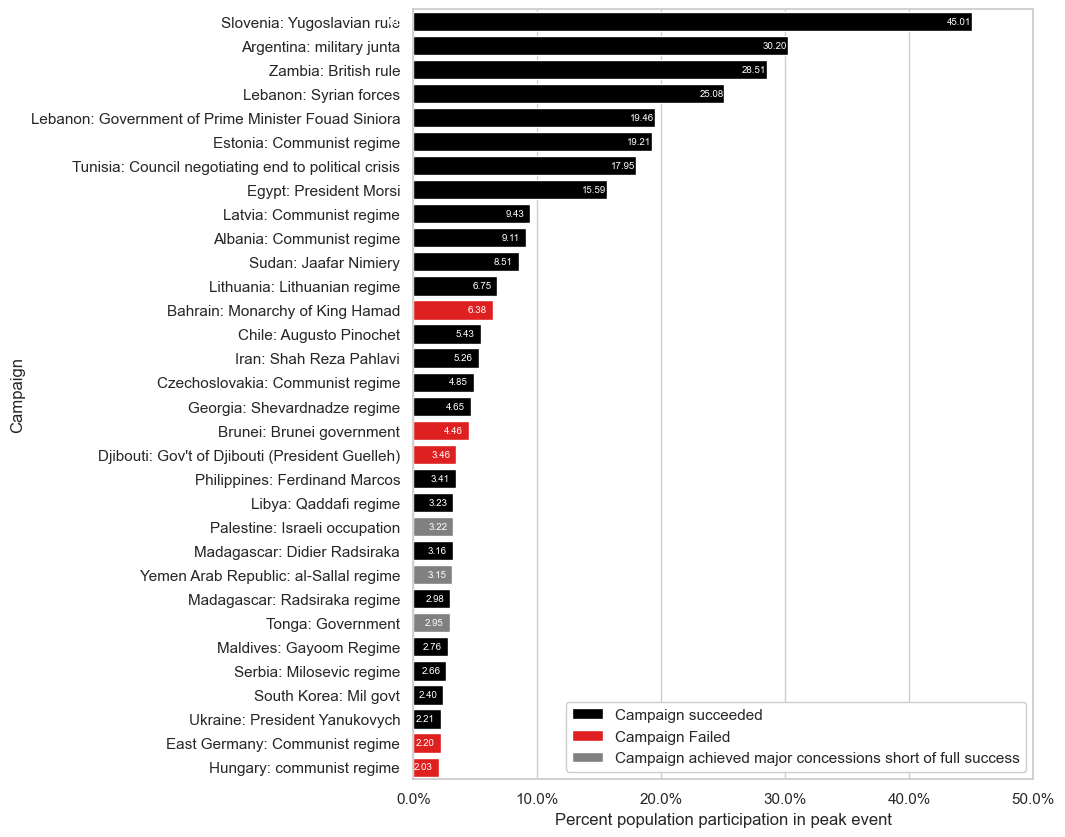

In [15]:
# Create a horizontal bar plot according to table resistance_campaigns
plt.figure(figsize=(8, 10))
palette = {'Campaign succeeded': 'black', 'Campaign achieved major concessions short of full success': 'grey', 'Campaign Failed': 'red'}
ax = sns.barplot(data=resistance_campaigns, y="Campaign", x = 'Percentage', hue = 'Outcome', width=0.8, palette = palette)
plt.xlim(0,resistance_campaigns.Percentage.max())

for p in ax.patches:
    width = p.get_width()
    plt.text(width - 2 , p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', color = 'white', fontsize = 7)

ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{x:.1f}%' for x in ticks])

ax.legend(framealpha=1)
plt.xlabel('Percent population participation in peak event')
plt.show()

*Greek Campaigns*

In [16]:
# Greek resistance campaigns
low_resistance_campaigns_greece = navco[(navco['PERCENTAGEPOPULARPARTICIPATION'] <= 0.02) & (navco['LOCATION'] == 'Greece')].sort_values(by = 'PERCENTAGEPOPULARPARTICIPATION', ascending = False)
low_resistance_campaigns_greece


NAVCOID             CAMPAIGN LOCATION   BYEAR   EYEAR  \
119    401.0      Greek Civil War   Greece  1946.0  1949.0   
120     89.0  Greek anti-military   Greece  1973.0  1974.0   

                        TARGET  SUCCESS  LIMITED  FAILURE  ONGOING  NONVIOL  \
119  British and US occupation      0.0      0.0      1.0      0.0      0.0   
120              Military rule      1.0      0.0      0.0      0.0      1.0   

     VIOL  REGCHANGE  FSELFDET  SECESSION  OTHER  DURATION  PARTICIPATION  \
119   1.0        0.0       1.0        0.0    0.0    1778.0        40000.0   
120   0.0        1.0       0.0        0.0    0.0     654.0         2500.0   

     PERCENTAGEPOPULARPARTICIPATION  REGVIOL  DEFECT  VIOLENTFLANK  VIOLSIM  \
119                        0.005092      1.0     0.0           NaN      0.0   
120                        0.000279      1.0     1.0           1.0      0.0   

     REGAID  STATESUP  
119     1.0       1.0  
120     1.0       0.0

Outside the largest resistance campaigns, we can detect two Greek campaigns:
* The fist one refers to the Greek Civil War.</br>
Below, there is a excerpt from Wikipedia with a few details about the issue: </br></br>
*"The Greek Civil War took place from 1946 to 1949. The conflict, which erupted shortly after the end of World War II, consisted of a communist-dominated uprising against the established government of the Kingdom of Greece. The opposition declared a people's republic, the Provisional Democratic Government of Greece, which was governed by the Communist Party of Greece (KKE) and its military branch, the Democratic Army of Greece (DSE). The rebels were supported by Yugoslavia and the Soviet Union. With the support of the United Kingdom and United States, the Greek government forces ultimately prevailed."* </br>
[Greek Civil War](https://en.wikipedia.org/wiki/Greek_Civil_War)

* The second Campaign refers to the Athens Polytechnic uprising. </br>
*"The Athens Polytechnic uprising occurred in November 1973 as a massive student demonstration of popular rejection of the Greek military junta of 1967–1974. It began on 14 November 1973, escalated to an open anti-junta revolt, and ended in bloodshed in the early morning of 17 November after a series of events starting with a tank crashing through the gates of the Athens Polytechnic."* </br>
You can find more details here [Athens Polytechnic Uprising](https://en.wikipedia.org/wiki/Athens_Polytechnic_uprising)

## 3. The Effect of Participation on the Probability of Campaign Success

*Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capital, controlling for the location’s logged population the year the campaign ends. Explain your results.* </br>

*Having done that, create a scatter plot showing the logged participants per capital, on the $x$ axis, and the probability of success, on the $y$ axis. Explain it as best you can.*

In [17]:
# Calculate logged population
navco['location_population_log']  = navco['PARTICIPATION']/navco['PERCENTAGEPOPULARPARTICIPATION']
navco['location_population_log'] = np.log(navco['location_population_log'])
navco.location_population_log.head()

0    16.562781
1    16.496532
2    16.924572
3    17.424293
4    15.007682
Name: location_population_log, dtype: float64

In [18]:
# Calculate membership per capita
navco['participation_log'] = np.log(navco['PARTICIPATION'])
navco['membership_per_capita'] = navco['participation_log']/ navco['location_population_log']
navco = navco.dropna(subset=['membership_per_capita'])


In [19]:
regr1 = logit("SUCCESS ~ membership_per_capita + location_population_log", navco).fit()
regr1.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Method:            MLE       
Dependent Variable:    SUCCESS           Pseudo R-squared:  0.130     
Date:                  2023-12-04 22:08  AIC:               447.3747  
No. Observations:      380               BIC:               459.1952  
Df Model:              2                 Log-Likelihood:    -220.69   
Df Residuals:          377               LL-Null:           -253.58   
Converged:             1.0000            LLR p-value:       5.1893e-15
No. Iterations:        6.0000            Scale:             1.0000    
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------
Intercept               -2.8142   1.4961 -1.8811 0.0600 -5.7465 0.1180
membership_per_capita    7.6475   1.1664  6.5563 0.0000  5.3613 9.9336
location_population_log -0.1388   0.0736 -1.8871 0.0591 -0.2830 0.0054
======================================================================

"""

>From the output of the logistic regression performance we conclude that :</br>
>
> * One unit increase in *membership_per_capita* variable when *location_population_log* remains on a fixed value, results in an increase of 7.6475 in the log odds of having a successful campain.</br>
>  
> * The p-value of *membership_per_capita* is equal to 0, which indicates the **statistical significance** of the variable, in contrast to *location_population_log*'s value 0.0591 > 0.05 (common aplha level), which indicates that it is not statistically significant.</br>
> 
> * The Pseudo R-squared value is not high enought, as it counts only to 0.130, indicating not a good fit for the logistic model. A good model would include a Pseudo R-squared value between 0.2 and 0.4.</br>

Text(0, 0.5, 'Probability of success')

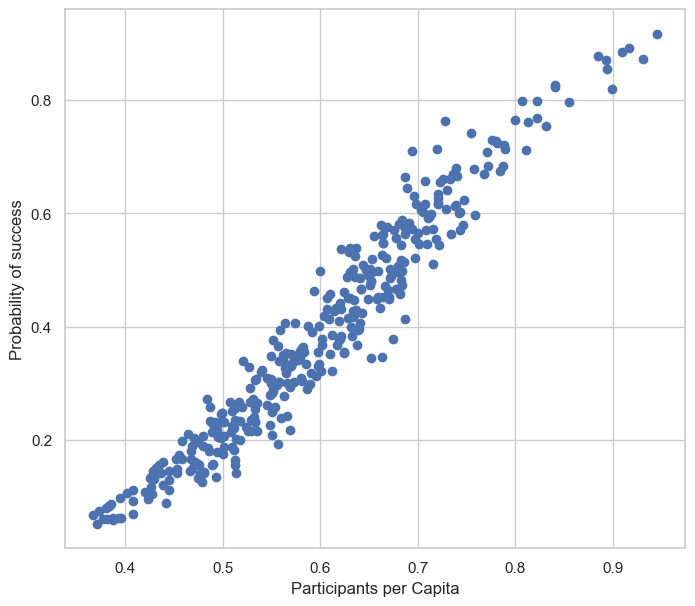

In [20]:
prediction = regr1.predict(transform=True)
plt.figure(figsize=(8, 7))
scatter = plt.scatter(x=navco.membership_per_capita, y=prediction)
plt.xlabel("Participants per Capita")
plt.ylabel("Probability of success")

*Then, do the same but with only the membership per capital as dependent variable. Explain why this plot is different than the previous one.*

In [21]:
regr2 = logit("SUCCESS ~ membership_per_capita ", navco).fit()
regr2.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   SUCCESS           Pseudo R-squared:  0.123     
Date:                 2023-12-04 22:08  AIC:               449.0222  
No. Observations:     380               BIC:               456.9026  
Df Model:             1                 Log-Likelihood:    -222.51   
Df Residuals:         378               LL-Null:           -253.58   
Converged:            1.0000            LLR p-value:       3.2041e-15
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept             -5.3469   0.7095 -7.5362 0.0000 -6.7375 -3.9563
membership_per_capita  8.0495   1.1414  7.0524 0.0000  5.8125 10.2866
=====================================================================

"""

>From the output of the logistic regression performance we conclude that :</br>
>* One unit increase in *membership_per_capita* variable when *location_population_log* remains on a fixed value, results in an increase of 8.6475 in the log odds of >having a successful campain.</br>
>  
>* The p-value of *membership_per_capita* is equal to 0, which indicates the **statistical significance** of the variable, as it is less than 0.05 (common aplha level).</br>
> 
>* The Pseudo R-squared value is very high. Specifically, it counts to 0.123, indicating not a very good fit for the logistic model. A good model would include a Pseudo R-squared value between 0.2 and 0.4.</br>

Text(0, 0.5, 'Probability of success')

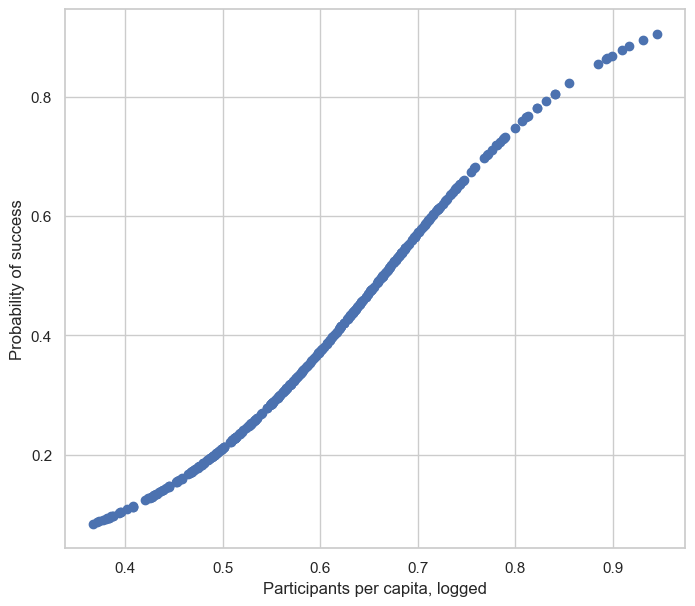

In [22]:
prediction = regr2.predict(transform=True)
plt.figure(figsize=(8, 7))
scatter = plt.scatter(x=navco.membership_per_capita, y=prediction)
plt.xlabel("Participants per capita, logged")
plt.ylabel("Probability of success")


>### Models' Scatterplot Comparison
>The first model uses 2 independent variables, *membership_per_capita* and *location_population_log*. Furthermore, these two variables seem to act as opposing forces (Increase & Decrease) upon the dependent variable. This results in higher values variation and therefore, in a more spread scatterplot. It should be noted that the plot represents the **membership_per_capita** variable that is  **controled** by the *location_population_log* values. Given the fact that *location_population_log* seems to be statistically insignificant, it might affect the *membership_per_capita* values negatively.</br>
>
>The second model, on the other hand, has the effect of a single, significant variable (*membership_per_capita*), and therefore it provides a more direct correlation between the dependent and independent variable, and so, a less spread scatterplot. 

## 4. The Level of Participation Tipping Point
*As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.Based on your data, create a table and explain how Chenoweth came up with the rule.*

In [23]:
# Create the table of peak popular participation percentages 
peak_popular_participation = pd.DataFrame(columns=['Peak Popular Participation (%)', 'Observations', 'Success Rate'])

# Define participation ranges
participation_ranges = [
    ('greater than 3.5%', (3.5, None)),
    ('1.0% - 3.5%', (1, 3.5)),
    ('0.25% - 1.0%', (0.25, 1)),
    ('0.06% - 0.25%', (0.06, 0.25)),
    ('0.015% - 0.06%', (0.015, 0.06)),
    ('0.0035% - 0.015%', (0.0035, 0.015)),
    ('less than 0.0035%', (0, 0.0035))
]

# Iterate over the ranges and calculate observations and success rate
for label, (lower, upper) in participation_ranges:
    observations_number = navco[
        (navco['PERCENTAGEPOPULARPARTICIPATION'] * 100 > lower) & 
        ((navco['PERCENTAGEPOPULARPARTICIPATION'] * 100 <= upper) if upper else True)
    ].shape[0]
    
    success_percentage = navco[
        (navco['PERCENTAGEPOPULARPARTICIPATION'] * 100 > lower) & 
        ((navco['PERCENTAGEPOPULARPARTICIPATION'] * 100 <= upper) if upper else True) &
        (navco['SUCCESS'] == 1)
    ].shape[0] / observations_number
    # Add the new row into the dataframe
    peak_popular_participation.loc[len(peak_popular_participation)] = {
        'Peak Popular Participation (%)': label,
        'Observations': observations_number,
        'Success Rate': success_percentage
    }

peak_popular_participation

Peak Popular Participation (%)  Observations  Success Rate
0              greater than 3.5%            18      0.888889
1                    1.0% - 3.5%            41      0.609756
2                   0.25% - 1.0%            92      0.456522
3                  0.06% - 0.25%            95      0.452632
4                 0.015% - 0.06%            66      0.242424
5               0.0035% - 0.015%            44      0.090909
6              less than 0.0035%            24      0.041667

In [24]:
# Format percentages
def format_success_rate(x):
    return f'{x * 100:.2f}%'
    
# Format the columns' text alignment
def left_align_first_column(dataframe):
    styles = []
    for i, col in enumerate(dataframe.columns):
        alignment = 'left' if i == 0 else 'right'
        styles.append({
            'selector': f'td.col{i}',
            'props': f'text-align: {alignment};'
        })
    return styles
    
# Apply formatting to the DataFrame
styled_peak_popular_participation = (
    peak_popular_participation.style
    .format({'Success Rate': format_success_rate})
    .hide(axis="index")
    .set_table_styles(left_align_first_column(peak_popular_participation))
)

styled_peak_popular_participation

>### Explanation
>Erica Chenoweth's 3.5% rule is a key insight derived from her extensive study of nonviolent resistance movements. Through analysis of (NAVCO) 1.1, a dataset of historical campaigns, Chenoweth found that when approximately 3.5% of a population actively engages in sustained nonviolent resistance, the movement is more likely to succeed in achieving its objectives. This threshold of active participation emerged as a significant factor influencing the outcomes of nonviolent movements. Nevertheless, in recent studies this percentage usually needs to be overpassed in order for a campaign to have higher probability of success, so the matter requires further investigation.

*Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way. From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.*

* I will use the second regression model, as it uses only statistically significant variables, and therefore I expect more representative results.

In [25]:
# Get the regression confidence intervals
ci = regr2.conf_int()
ci

0          1
Intercept             -6.737471  -3.956310
membership_per_capita  5.812452  10.286588

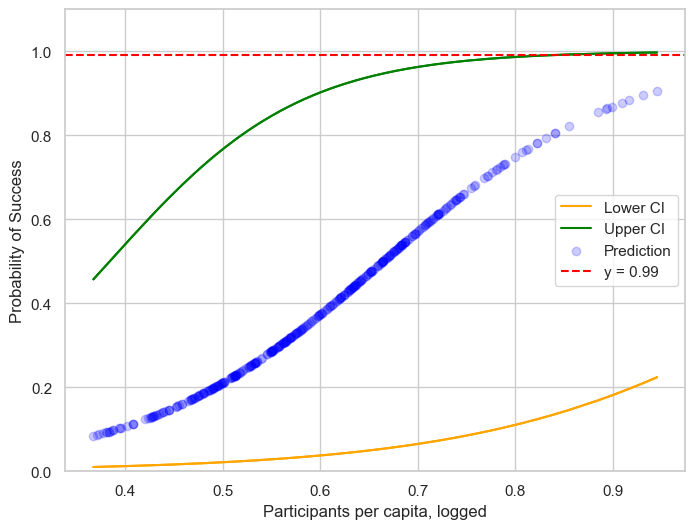

In [33]:
a_low, b_low = ci.iloc[1, 0], ci.iloc[0, 0]
a_upper, b_upper = ci.iloc[1, 1], ci.iloc[0, 1]


def logistic_function(x, a, b):
    return 1 / (1 + np.exp(-(a * x + b)))

# Generate x values
x_values = np.sort(navco['membership_per_capita'])

# Calculate logistic regression y values using the confidence intervals
y_values_low = logistic_function(x_values, a_low, b_low)
y_values_upper = logistic_function(x_values, a_upper, b_upper)

# Plot the logistic curves
plt.figure(figsize=(8, 6))

# Plot lines between neighboring points
plt.plot(x_values, y_values_low, color='orange', label='Lower CI')
plt.plot(x_values, y_values_upper, color='green', label='Upper CI')

# Add scatter plot for actual data points
plt.scatter(x=navco['membership_per_capita'], y=prediction, color='blue', label='Prediction', alpha = 0.2)

# Connect points with lines
plt.plot(x_values, y_values_low, color='orange', linestyle='-')
plt.plot(x_values, y_values_upper, color='green', linestyle='-')

plt.axhline(y=0.99, color='red', linestyle='--', label='y = 0.99')

plt.ylabel('Probability of Success')
plt.xlabel('Participants per capita, logged')
plt.ylim(0, 1.1)
plt.legend()
plt.show()


The upper curve indicates the upper limit of confidence interval of 95 %. So it will be used to find the percentages of membership_per_capita that result to success percentage over 99%. I will get the value where the upper confidence interval limit intersects the horizontal line y = 0.99.

In [27]:
# Get all points upon the confidence interval upper curve
points = pd.DataFrame({'x': x_values, 'y': y_values_upper})
# Keep the points with success percentage >= 99%
over_099 = points[points.y >= 0.99]
# Get the point with the minimum success percentage
over_099_min = over_099.loc[over_099['y'].idxmin()]
over_099_min['x']
over_099

x         y
369  0.840339  0.990878
370  0.840363  0.990880
371  0.854833  0.992132
372  0.884335  0.994179
373  0.892521  0.994647
374  0.894139  0.994735
375  0.898510  0.994965
376  0.909004  0.995478
377  0.916722  0.995822
378  0.930431  0.996369
379  0.944982  0.996872

In [28]:
# For the 84.03% membership_per_capita value, get the percentage of participation
requested_percentage = navco[navco['membership_per_capita'] == over_099_min['x']]
(requested_percentage.PERCENTAGEPOPULARPARTICIPATION * 100).round(2).astype(str) + ' %'

4    9.11 %
Name: PERCENTAGEPOPULARPARTICIPATION, dtype: object

To conclude, the percentage of participation that is found to be the tipping point that leads to probability of campaign success over 99% is **9.11%**.

## 5. Nonviolent Resistance and Target Regime Type

*Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.*

* For this question we need to use the polity V score that is found into the "p5v2018.xls" file. Νevertheless, the file contains rows of data that do not exist on the navco file, which we study, so we need to keep only the rows of interest. To do that we will merge the two tables according to the year a campaign ends (EYEAR) and the country where the campaign takes place (LOCATION).

In [29]:
# Read the file
pv = pd.read_excel('./data/p5v2018.xls', index_col=0)
# Rename needed columns to make merge easier 
pv = pv.rename(columns = {'year' : 'EYEAR', 'country' : 'LOCATION'})
# Merge the two dataframes
all_data = pd.merge(navco, pv, on=['EYEAR', 'LOCATION'])
all_data.head()

NAVCOID                        CAMPAIGN     LOCATION   BYEAR   EYEAR  \
0      4.0                         Afghans  Afghanistan  1978.0  1979.0   
1      3.0               Afghan resistance  Afghanistan  1980.0  1989.0   
2    218.0  Taliban/anti-government forces  Afghanistan  1992.0  1996.0   
3    217.0                         Taliban  Afghanistan  2001.0  2014.0   
4      5.0         Albanian anti-communist      Albania  1990.0  1991.0   

              TARGET  SUCCESS  LIMITED  FAILURE  ONGOING  NONVIOL  VIOL  \
0  Afghan government      1.0      0.0      0.0      0.0      0.0   1.0   
1  Soviet occupation      1.0      0.0      0.0      0.0      0.0   1.0   
2      Afghan regime      1.0      0.0      0.0      0.0      0.0   1.0   
3  Afghan government      0.0      0.0      1.0      1.0      0.0   1.0   
4   Communist regime      1.0      0.0      0.0      0.0      1.0   0.0   

   REGCHANGE  FSELFDET  SECESSION  OTHER  DURATION  PARTICIPATION  \
0        1.0       0.0        0.0    0.0     613.0        10000.0   
1        0.0       1.0        0.0    0.0    3281.0        10000.0   
2        1.0       0.0        0.0    0.0    1370.0        20000.0   
3        1.0       0.0        0.0    0.0    4391.0        60000.0   
4        1.0       0.0        0.0    0.0     442.0       300000.0   

   PERCENTAGEPOPULARPARTICIPATION  REGVIOL  DEFECT  VIOLENTFLANK  VIOLSIM  \
0                        0.000641      1.0     1.0           NaN      1.0   
1                        0.000685      1.0     0.0           NaN      1.0   
2                        0.000893      1.0     0.0           NaN      1.0   
3                        0.001625      1.0     1.0           NaN      1.0   
4                        0.091068      1.0     0.0           0.0      1.0   

   REGAID  STATESUP  location_population_log  participation_log  \
0     1.0       1.0                16.562781           9.210340   
1     0.0       1.0                16.496532           9.210340   
2     0.0       0.0                16.924572           9.903488   
3     1.0       0.0                17.424293          11.002100   
4     1.0       0.0                15.007682          12.611538   

   membership_per_capita    cyear  ccode scode  flag  fragment  democ  autoc  \
0               0.556087  7001979    700   AFG     0       NaN    -66    -66   
1               0.558320  7001989    700   AFG     0       NaN      0      8   
2               0.585154  7001996    700   AFG     0       NaN      0      7   
3               0.631423  7002014    700   AFG     0       2.0      1      2   
4               0.840339  3391991    339   ALB     0       NaN    -88    -88   

   polity  polity2  durable  xrreg  xrcomp  xropen  xconst  parreg  parcomp  \
0     -66      NaN      0.0    -66     -66     -66     -66     -66      -66   
1      -8     -8.0      0.0      2       1       4       2       4        1   
2      -7     -7.0      0.0      1       0       0       1       4        1   
3      -1     -1.0      0.0      2       1       4       4       1        0   
4     -88      3.0      0.0    -88     -88     -88     -88     -88      -88   

   exrec  exconst  polcomp  prior  emonth  eday   eyear  eprec  interim  \
0  -66.0      -66    -66.0    NaN    12.0  27.0  1979.0    NaN    -66.0   
1    3.0        2      1.0   -7.0     4.0  16.0  1978.0    3.0    -66.0   
2    4.0        1      1.0   -8.0     4.0  16.0  1992.0    2.0    -77.0   
3    3.0        4      4.0   -7.0    10.0   7.0  2001.0    1.0    -66.0   
4  -88.0      -88    -88.0    NaN     6.0  11.0  1991.0    1.0    -88.0   

   bmonth  bday   byear  bprec  post  change   d5   sf  regtrans  
0     NaN   NaN     NaN    NaN   NaN   -66.0  NaN  1.0     -66.0  
1     2.0   4.0  1989.0    1.0  -8.0    -1.0  1.0  NaN       0.0  
2     9.0  27.0  1996.0    9.0  -7.0     1.0  1.0  1.0       0.0  
3    12.0  29.0  2014.0    2.0  -1.0     6.0  1.0  NaN       1.0  
4     NaN   NaN     NaN    NaN   NaN     0.0  NaN  NaN       3.0

* For the logistic regression polity2 column will be used, as some values have been modified to facilitate the use and interpretation of the data. 

In [30]:
# Run logistic regression
regr3 = logit("SUCCESS ~ NONVIOL + polity2 + participation_log + location_population_log ", all_data).fit()
regr3.summary2()

Optimization terminated successfully.
         Current function value: 0.536938
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Method:             MLE       
Dependent Variable:   SUCCESS            Pseudo R-squared:   0.203     
Date:                 2023-12-04 22:08   AIC:                328.9411  
No. Observations:     297                BIC:                347.4098  
Df Model:             4                  Log-Likelihood:     -159.47   
Df Residuals:         292                LL-Null:            -199.97   
Converged:            1.0000             LLR p-value:        1.0749e-16
No. Iterations:       6.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.8727   1.4980  1.2501 0.2113 -1.0634  4.8087
NONVIOL                  0.8662   0.2951  2.9355 0.0033  0.2879  1.4445
polity2                  0.0522   0.0254  2.0573 0.0397  0.0025  0.1020
participation_log        0.4367   0.0901  4.8493 0.0000  0.2602  0.6132
location_population_log -0.4270   0.0988 -4.3212 0.0000 -0.6207 -0.2333
=======================================================================

"""

As we can see in the logistic regression summary table, the nonviolent resistance remains statistically significant event under the control of regime type. The p-value of nonviolence is 0.0033 < 0.05 (common alpha level) which means that the variable still maintains its significance. Furthermore, the model has Pseudo R-square equal to 0.203, which indicates a very good fit.